# Import Packages

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV 
from scipy import stats 

In [2]:
data=pd.read_csv(r'C:\Users\ADMIN\Downloads\ML Question Paper\ML Question Paper\Datasets\bank.csv',header=0,delimiter=';')

# Q1

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
data.shape

(41188, 21)

In [7]:
data.duplicated().sum()

12

### we are having total 12 duplicates in data so dropping them..

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

0

## Box plot

#### Applying box plot to see if there are any outliers present in data or not....

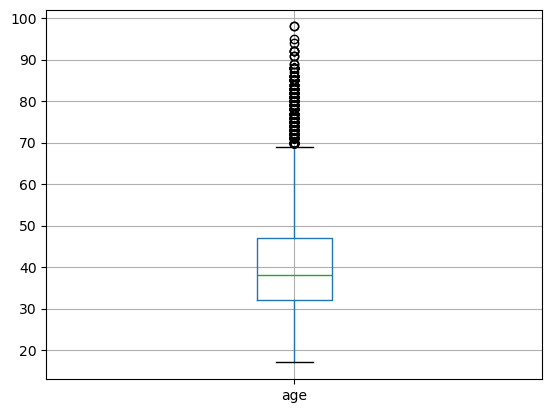

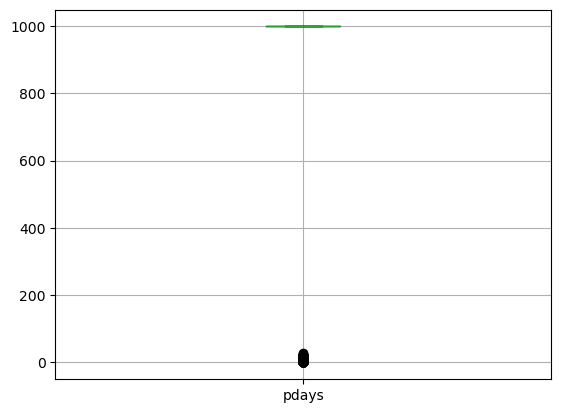

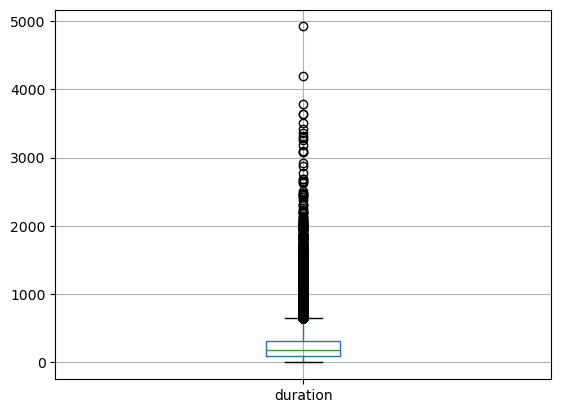

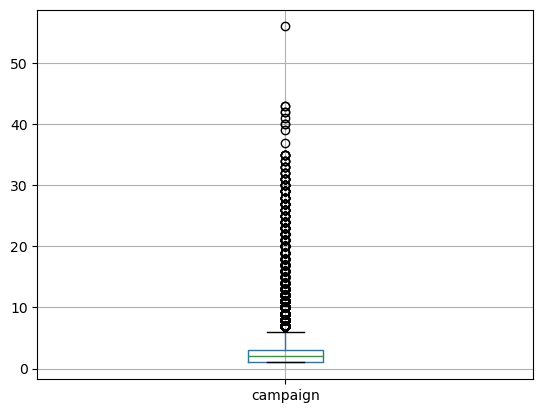

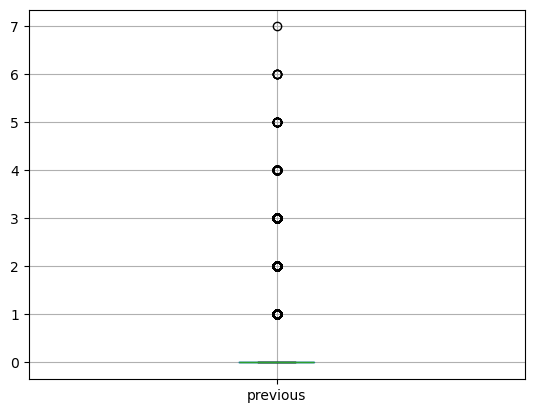

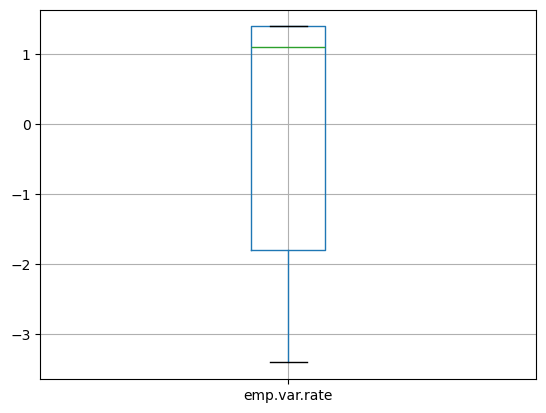

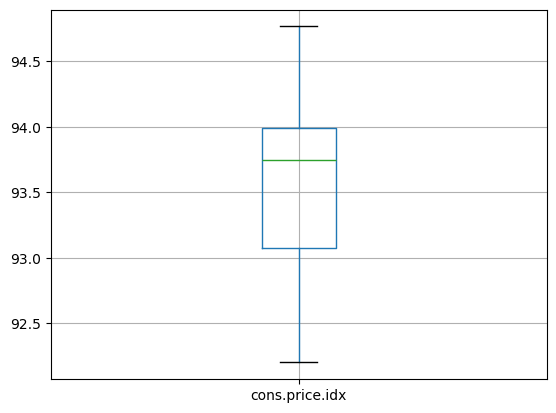

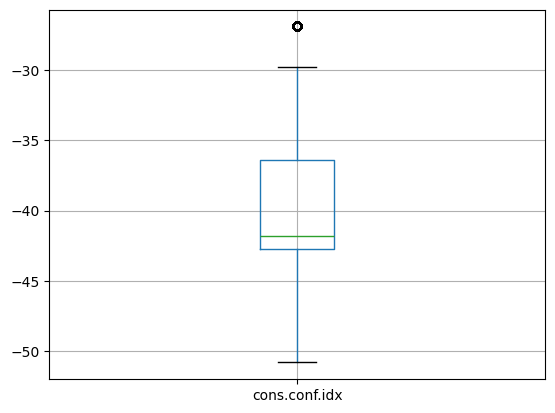

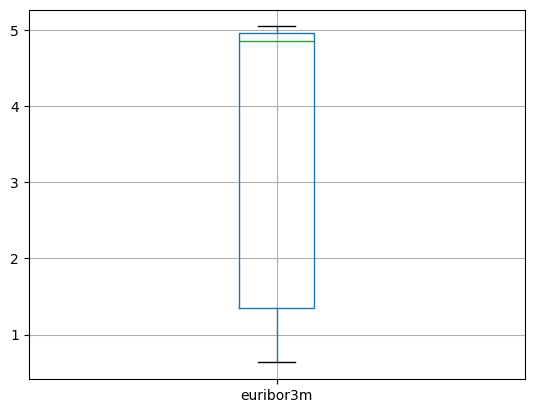

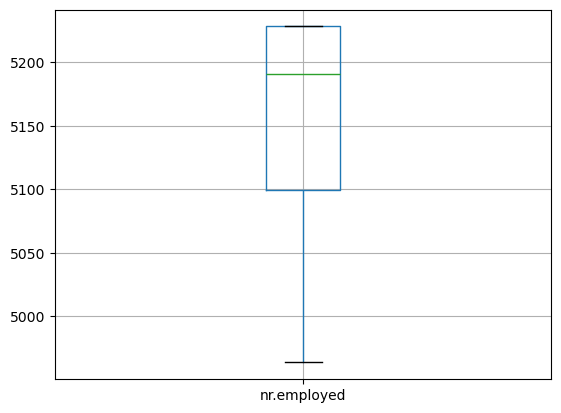

In [10]:
colname=['age','pdays','duration','campaign','previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in colname:
    data.boxplot(column=i)
    plt.show()

# Histogram 

In [11]:
hist=data.hist(figsize=(10,10))

### From this histogram we can see that:
#### Variables like duration, campaign, and previous are highly skewed
##### Most customers are only contacted a few times, suggesting the campaign targets new people rather than repeatedly contacting the same ones.


# Bar plot

### Ploting barplot between continous numeric indepedent variables and our target variable(y)...

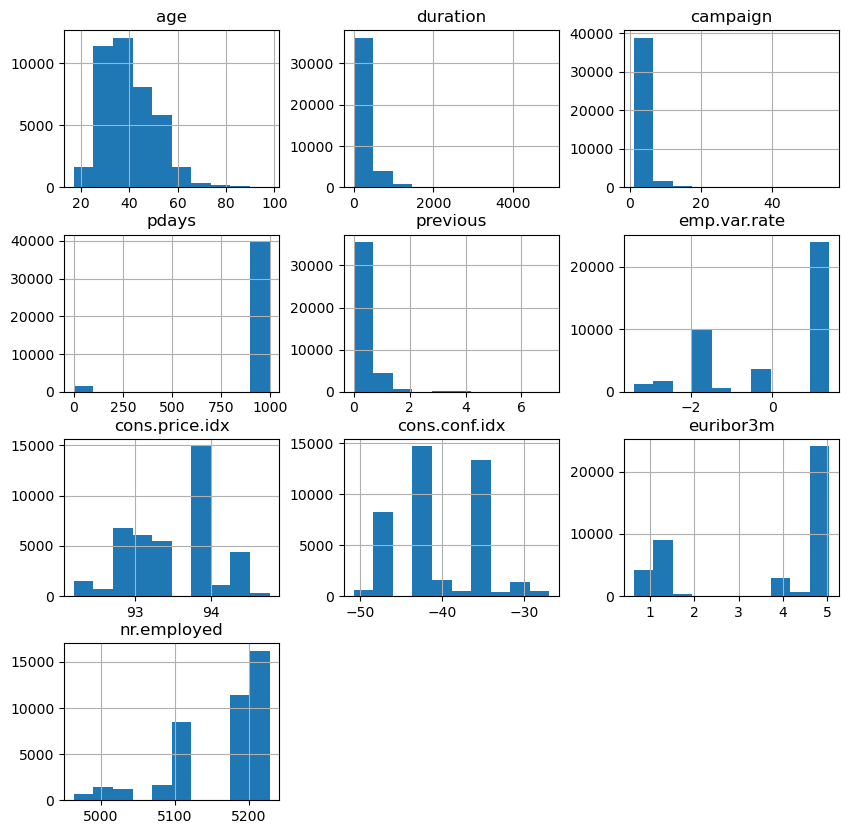

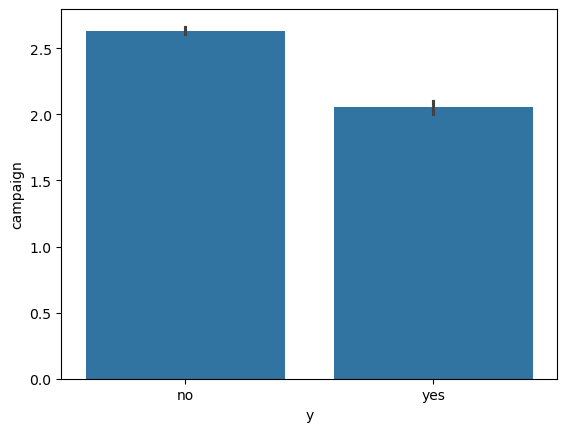

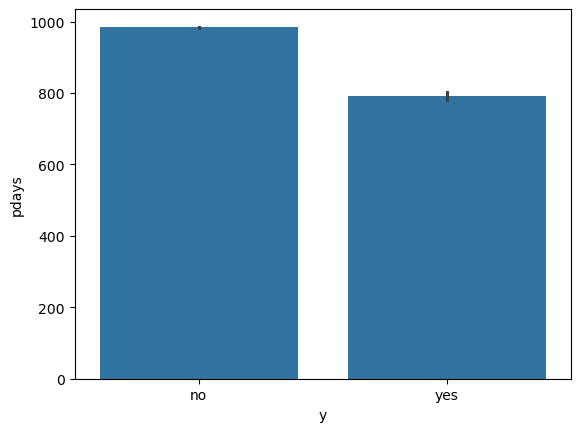

In [12]:
col=['duration','campaign','pdays']
for i in col:
    sns.barplot(data=data,x='y',y=i)
    plt.show()

# Heat Map

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000808  0.004622 -0.034381  0.024379   
duration       -0.000808  1.000000 -0.071765 -0.047556  0.020600   
campaign        0.004622 -0.071765  1.000000  0.052606 -0.079182   
pdays          -0.034381 -0.047556  0.052606  1.000000 -0.587508   
previous        0.024379  0.020600 -0.079182 -0.587508  1.000000   
emp.var.rate   -0.000242 -0.027941  0.150786  0.271063 -0.420587   
cons.price.idx  0.001009  0.005303  0.127826  0.078920 -0.203197   
cons.conf.idx   0.129075 -0.008126 -0.013657 -0.091374 -0.050929   
euribor3m       0.010852 -0.032861  0.135169  0.296946 -0.454571   
nr.employed    -0.017607 -0.044672  0.144129  0.372659 -0.501411   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000242        0.001009       0.129075   0.010852   
duration           -0.027941        0.005303      -0.008126  -0.032861   
campaign            0.150786 

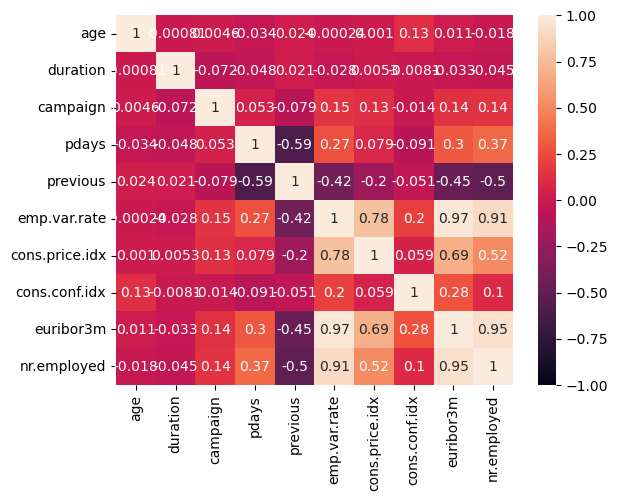

In [13]:
b=data[['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
b
corr_df = b.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)   
plt.show()

# Q2(a) Missing Value Analysis

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### There are no missing values in data

### Checking for unique values

In [15]:
print(data.columns)
for i in data.columns:
    print(data[i].unique())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['m

In [16]:
data.replace("unknown",np.nan,inplace=True)

In [17]:
for i in data.columns:
    print(data[i].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
['married' 'single' 'divorced' nan]
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
['no' nan 'yes']
['no' 'yes' nan]
['no' 'yes' nan]
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
[0 1 2 3 4 5 6 7]
['nonexis

In [18]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [19]:
missing_values=data.isnull()
for i in missing_values:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [20]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Q2(b)Label Encoding wherever required

In [21]:
# Label Encoding 
colname=[]
for x in data.columns:
    if data[x].dtype== 'object':
        colname.append(x)
colname

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [22]:
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,1,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,1,1,6,1,...,0,26,0,1,8,18,16,287,8,0


In [23]:
data.shape

(41176, 21)

# Q2.(c)Selecting important features based on Random Forest

In [24]:
data.drop(['housing'],axis=1,inplace=True)

# Q2.(d)Handling unbalanced data using SMOTE

In [25]:
X=data[['age','job', 'marital', 'education', 'default', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
Y=data['y']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [27]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3765
Before OverSampling, counts of label '0':  29175
After OverSampling, the shape of train_X:  (58350, 19)
After OverSampling, the shape of train_y:  (58350,)
After OverSampling, counts of label '1':  29175
After OverSampling, counts of label '0':  29175


# Q2(e) Standardize the data using any one of the scalers provided by sklearn

In [28]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [29]:
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

# Q3(a) Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train_res,Y_train_res)
print(log.intercept_)
print(log.coef_)

[0.08644549]
[[ 6.81154353e-03  1.87270780e-02 -4.37217605e-02  8.36112197e-02
  -3.25446152e-05 -1.14720538e-01 -1.98140204e-01 -1.47942068e-01
  -8.50751081e-02  7.12541178e-03 -2.42616439e-01 -2.94734703e-02
  -1.04201616e-02  1.26320812e-01 -4.38501693e-01  6.72537639e-02
   6.48417431e-02  6.35221913e-03 -3.12287786e-01]]


In [31]:
Y_pred=log.predict(X_test)
print(Y_pred)

[0 0 0 ... 1 0 1]


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[6207 1155]
 [ 146  728]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7362
           1       0.39      0.83      0.53       874

    accuracy                           0.84      8236
   macro avg       0.68      0.84      0.72      8236
weighted avg       0.91      0.84      0.87      8236

Accuracy of the model:  0.8420349684312773


# Q3(b) Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier 
model_DT=DecisionTreeClassifier(random_state=10,
                                criterion='gini')
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[6853  509]
 [ 404  470]]
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7362
           1       0.48      0.54      0.51       874

    accuracy                           0.89      8236
   macro avg       0.71      0.73      0.72      8236
weighted avg       0.90      0.89      0.89      8236

Accuracy of the model:  0.8891452161243322


#### After prunning Decision Tree model we can conclude that accuracy is increased.  

# Q3(c) Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1,
                       random_state=10)
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [36]:
model_RandomForest.score(X_train, Y_train)

0.9991803278688525

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report: ")
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7050  312]
 [ 401  473]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7362
           1       0.60      0.54      0.57       874

    accuracy                           0.91      8236
   macro avg       0.77      0.75      0.76      8236
weighted avg       0.91      0.91      0.91      8236

Accuracy of the model:  0.9134288489558038


In [38]:
print(list(zip(data.columns[1:],model_RandomForest.feature_importances_)))

[('job', 0.09557402715361958), ('marital', 0.04820829796247197), ('education', 0.02356735781808579), ('default', 0.03945777734012082), ('loan', 9.088627590726897e-09), ('contact', 0.013246265061203332), ('month', 0.009939493818497638), ('day_of_week', 0.017938279697082758), ('duration', 0.04023775872416202), ('campaign', 0.3344261762787126), ('pdays', 0.044143349860565124), ('previous', 0.039534522891848195), ('poutcome', 0.013479987668620446), ('emp.var.rate', 0.02683106876409448), ('cons.price.idx', 0.02080363250858942), ('cons.conf.idx', 0.023480039022197228), ('euribor3m', 0.029550296252880626), ('nr.employed', 0.11126214316765476), ('y', 0.06831951692096565)]


### By comparing all the models we can see that the random forest is best model for the prediction as it has predicted more accurately than another models

# part 2:  unsupervised learning

In [39]:
cc=pd.read_csv(r'C:\Users\ADMIN\Downloads\ML Question Paper\ML Question Paper\Datasets\credit_card.csv',index_col=0)
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:
#checking info
cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [41]:
#checking for null values
cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [42]:
#printing the statistical info
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [43]:
#checking for null values

In [44]:
cc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [45]:
#There are two null values present one in credit_limit and 313 in miminum_payments variable....

In [46]:
cc.fillna(cc['MINIMUM_PAYMENTS'].median(),inplace=True)

In [47]:
cc.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [48]:
# plotting the histogram

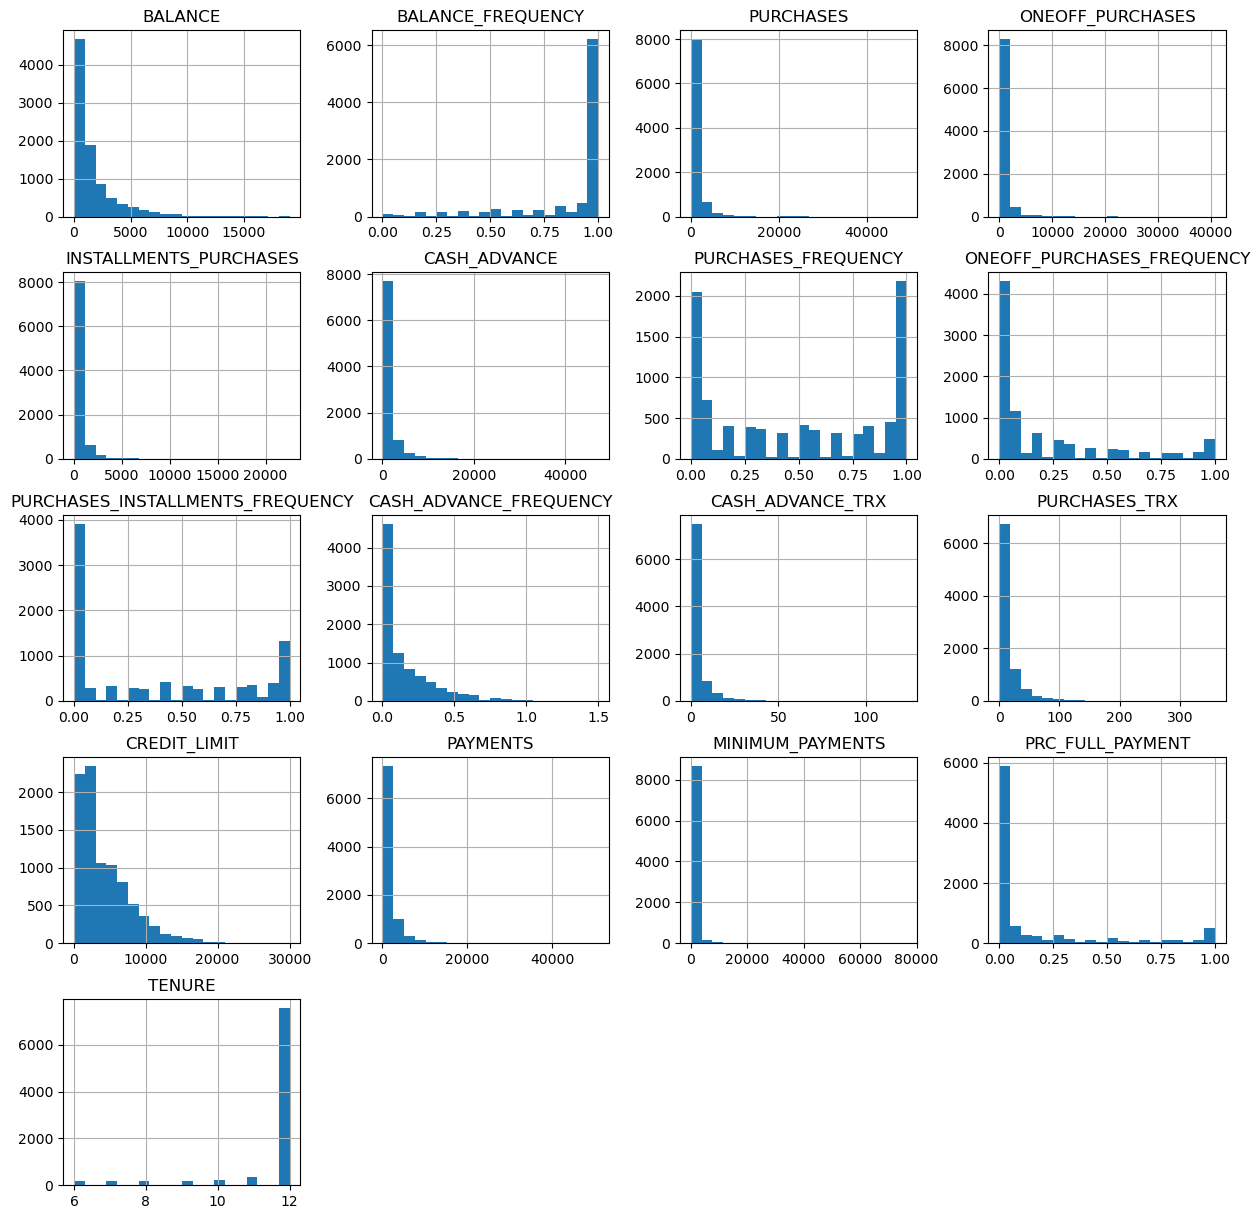

In [49]:
fig, axes = plt.subplots(figsize=(15, 15))
cc.hist(ax=axes,bins=20)
plt.show()

In [50]:
# checking for duplicated values

In [51]:
cc.duplicated().sum()

0

In [52]:
#z-score

In [53]:
z=stats.zscore(cc).abs()
cc=cc[(z<3).all(axis=1)]

In [54]:
cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19117,121.294493,0.750000,385.26,385.26,0.00,169.554775,0.500000,0.500000,0.000000,0.125000,3,7,500.0,98.225317,113.944625,0.000000,8
C19118,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8
C19119,869.328293,0.750000,0.00,0.00,0.00,1153.925205,0.000000,0.000000,0.000000,0.125000,3,0,1200.0,150.755024,337.986933,0.000000,8


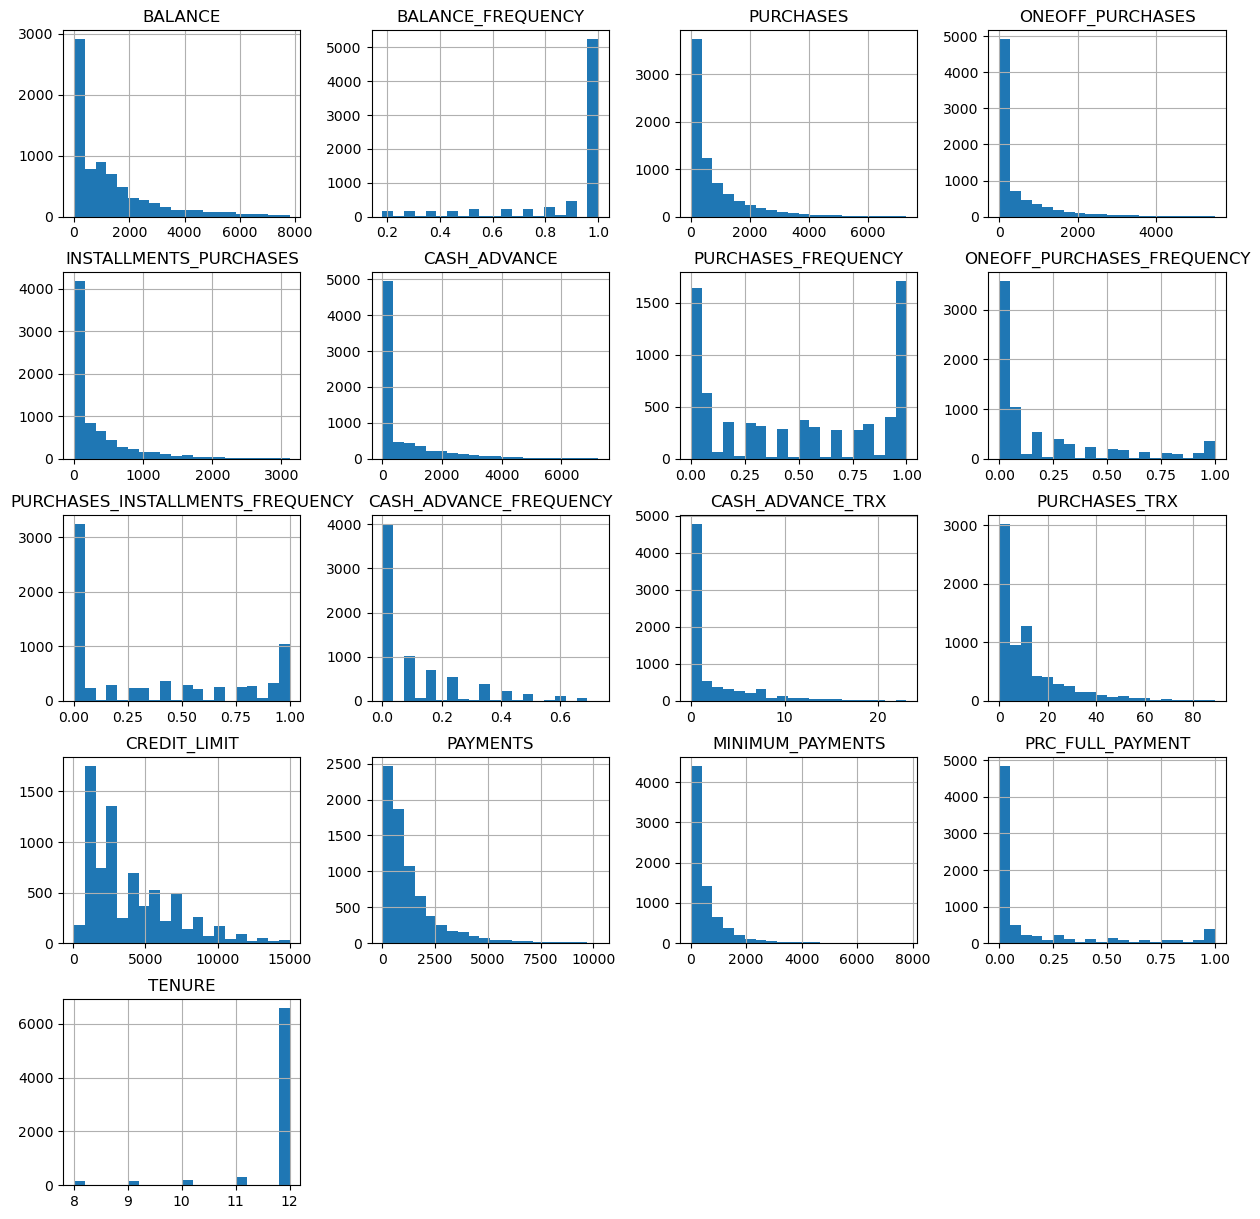

In [55]:
fig, axes = plt.subplots(figsize=(15, 15))
cc.hist(ax=axes,bins=20)
plt.show()

In [56]:
#heatmap

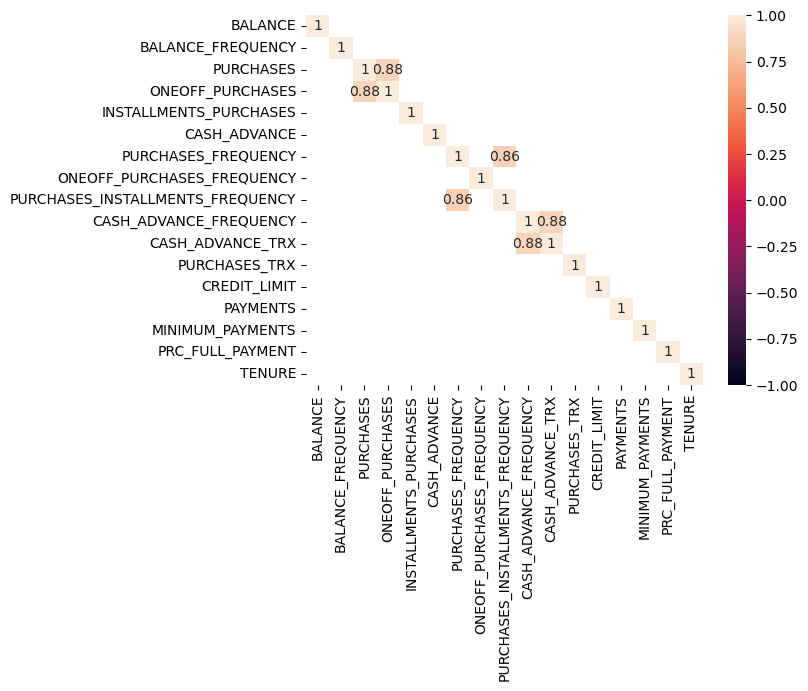

In [57]:
corr_df=cc.corr()
corr_df=corr_df[corr_df > 0.8]
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [58]:
cc.drop(['PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1,inplace=True)

In [59]:
X=cc

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [61]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components =0.95)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28120185 0.21643424 0.08537839 0.07219013 0.06699998 0.05696431
 0.04945371 0.04003292 0.03615958 0.02868291 0.01892705]


In [62]:
pca.n_components_

11

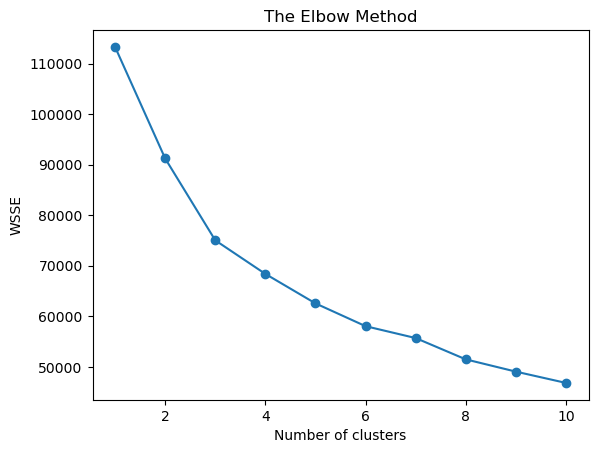

In [63]:
wsse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)#inertia is WSSE
plt.plot(range(1,11), wsse)
plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [64]:
wsse


[113285.24477385846,
 91222.77509675655,
 75032.59647634714,
 68388.54231814432,
 62561.70853917003,
 58053.84704585385,
 55703.35512024156,
 51489.700884812075,
 49064.134018483004,
 46831.07318630089]

In [65]:
#fitting K-Means to the dataset
kmeans=KMeans(n_clusters=3,random_state=42)
Y_pred=kmeans.fit_predict(X)

In [66]:
Y_pred


array([1, 2, 0, ..., 1, 1, 1])

In [67]:
kmeans.inertia_

75032.48277744817

In [68]:
kmeans.n_iter_

12

In [69]:
cc['Clusters']=Y_pred

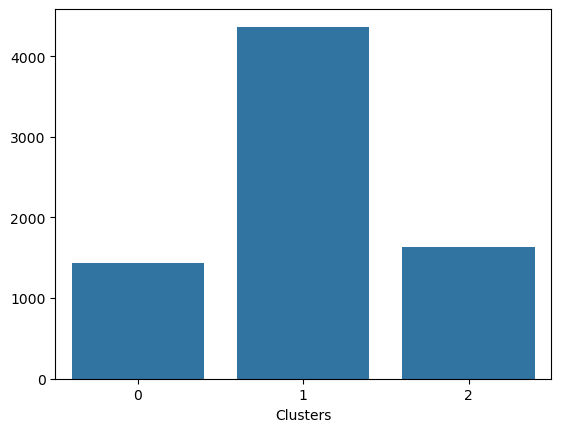

In [70]:
cluster_counts=cc['Clusters'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.show()

#### We can analyze that we have a total of 3 clusters.

In [71]:
from sklearn.metrics import silhouette_score
silhouette_score(X,Y_pred)

0.2409848354186834

In [72]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)  
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    Y_pred = kmeans.fit_predict(X)
    
    
    score = silhouette_score(X, Y_pred)
    silhouette_scores.append(score)
    
    
    print("For k =",k,"the silhouette score is:",score)

optimal_k = k_values[np.argmax(silhouette_scores)]
print("The optimal value of k is:" ,optimal_k)

For k = 2 the silhouette score is: 0.25607333343516664
For k = 3 the silhouette score is: 0.2409848354186834
For k = 4 the silhouette score is: 0.16685930268941856
For k = 5 the silhouette score is: 0.17958111825540932
For k = 6 the silhouette score is: 0.18999146586412724
For k = 7 the silhouette score is: 0.19077668462981784
For k = 8 the silhouette score is: 0.20205619706707525
For k = 9 the silhouette score is: 0.17730976088565276
For k = 10 the silhouette score is: 0.17625122849345318
The optimal value of k is: 2
